In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Transformations

### Translation (shifting of an image)

In [10]:
def translate(img,x,y):
    trans = np.float32([[1,0,x],[0,1,y]])
    dim = (img.shape[1],img.shape[0])
    return cv.warpAffine(img,trans,dim)

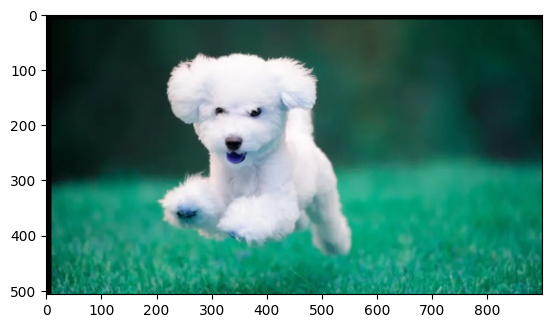

In [12]:
# +x -> right, -x -> left, -y -> up, +y -> down
img = cv.imread("dog.jpeg")
translated = translate(img,10,10)
plt.imshow(translated)

### Rotation

In [15]:
def rotate(img,angle,rotation_point=None):
    (height,width) = img.shape[:2]
    if rotation_point == None:
        rotation_point = (width//2,height//2)
    rotMatrix = cv.getRotationMatrix2D(rotation_point,angle,1.0)
    dim=(width,height)
    return cv.warpAffine(img,rotMatrix,dim)

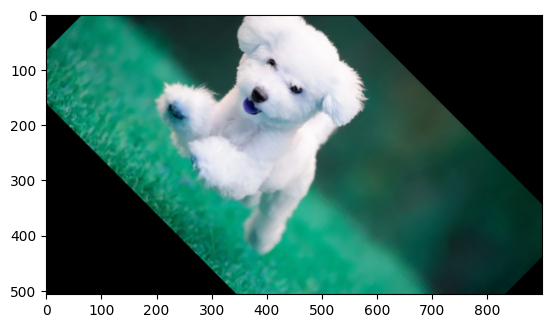

In [18]:
# +x -> anticlockwise, -x -> clockwise
rotated_img = rotate(img,-45)
plt.imshow(rotated_img)

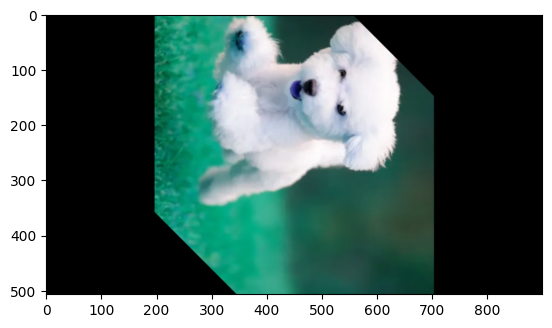

In [19]:
# rotate it further
rotated_img = rotate(rotated_img,-45)
plt.imshow(rotated_img)

### Resizing

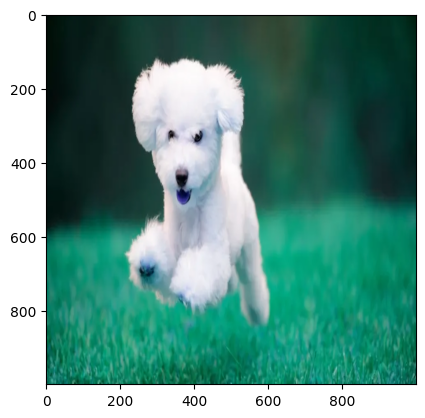

In [20]:
resized = cv.resize(img,(1000,1000),interpolation=cv.INTER_CUBIC)
plt.imshow(resized)

### Flipping an image

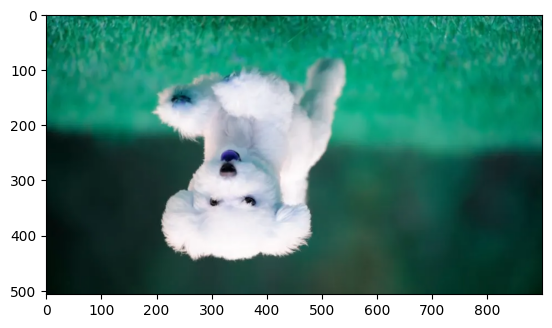

In [21]:
flip = cv.flip(img,0)
plt.imshow(flip)

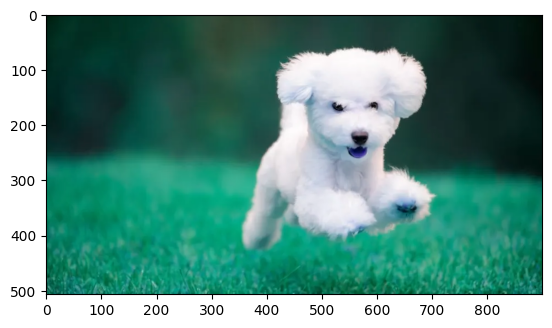

In [22]:
flip = cv.flip(img,1)
plt.imshow(flip)

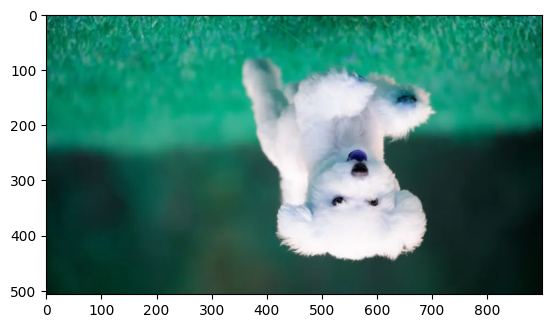

In [24]:
# both vertically + horizontally flipped
flip = cv.flip(img,-1)
plt.imshow(flip)

### Cropping

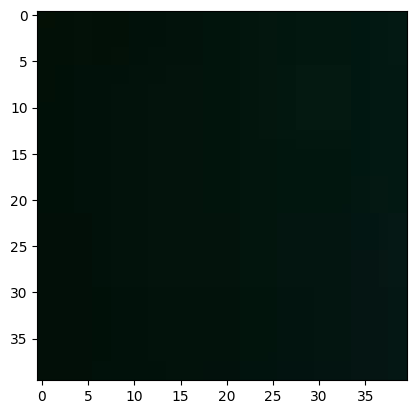

In [43]:
img = cv.imread("dog.jpeg")
cropped = img[10:50,10:50]
plt.imshow(cropped)

# Contour Detection
### identify contours or boundries of object
### contours =/= edges
### contours are essential for shape analysis, objection detection/recognition

In [47]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray,(5,5),cv.BORDER_DEFAULT) # reduce number of edges detection, hence, less countours
cany = cv.Canny(blur,125,175)

# findContours looks at structuring element/ edges found in image and returns 2 things
# contours = python list of all coordinates of countours found in image
# hiearchies = hiearchincal representations of countours
# RETR_LIST = returns all countours found in image
# RETR_EXTERNAL = returns only external countours
# RETR_TREE = returns all hiearchical countours

# CHAIN_APPROX_NONE = does nothing
# CHAIN_APPROX_SIMPLE = compresses all countours
# eg, a ling stays same in CHAIN_APPROX_NONE while only endpoints are returned in CHAIN_APPROX_SIMPLE
contours, hiearchies = cv.findContours(cany,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
print(len(contours))
# plt.imshow(cany)

39


### Alternative to Cany = Threhold

284


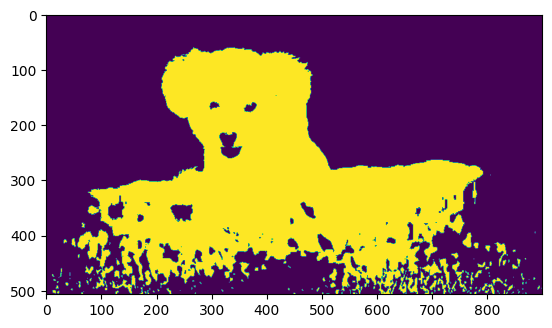

In [34]:
ret, thresh = cv.threshold(gray,125,255,cv.THRESH_BINARY)
plt.imshow(thresh)
contours, hiearchies = cv.findContours(thresh,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
print(len(contours))

### Displaying countours over an image

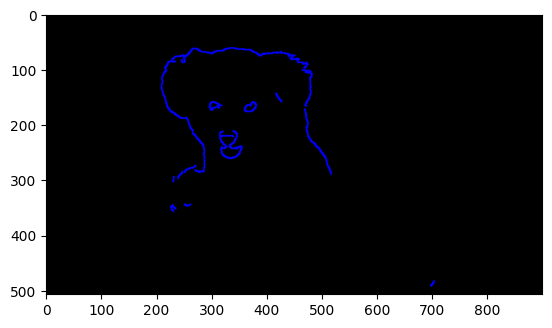

In [48]:
blank = np.zeros(img.shape,dtype="uint8")
cv.drawContours(blank,contours,-1,(0,0,255),2)
plt.imshow(blank)